In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
# datasets = ['breast_cancer.csv', 'diabetes_prediction_dataset.csv']

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# lr = 0.001

In [2]:
df = pd.read_csv("5CV_MLP_102_L1to4_0_001.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,Dataset#,L,att_1,att_2,att_3,att_4
0,1,1,0.561,0.5547,0.5683,0.531
1,1,4,0.5326,0.5707,0.5781,0.541
2,1,7,0.569,0.5636,0.5682,0.5872
3,1,10,0.5898,0.5521,0.64,0.5521
4,1,13,0.6177,0.5819,0.5962,0.6278
...,...,...,...,...,...,...
10296,105,286,0.5295,0.4091,0.3468,0.5304
10297,105,289,0.8773,0.5342,0.8664,0.2917
10298,105,292,0.5776,0.5193,0.6779,0.537
10299,105,295,0.5312,0.7047,0.7017,0.3571


In [3]:
for i in range(1, 2):    
    if i == 23 or i == 82 or i == 84:
        continue        
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i] / Select one dataset
    df_total = pd.DataFrame(df_d['L'].astype(float), columns = ['L'])
    df_total['average'] = (df_d['att_1'].astype(float) + df_d['att_2'].astype(float) + df_d['att_3'].astype(float) + df_d['att_4'].astype(float))/4
    x = df_total['L']
    y = df_total['average']
df_d

<1th>


,Dataset#,L,att_1,att_2,att_3,att_4
0,1,1,0.561,0.5547,0.5683,0.531
1,1,4,0.5326,0.5707,0.5781,0.541
2,1,7,0.569,0.5636,0.5682,0.5872
3,1,10,0.5898,0.5521,0.64,0.5521
4,1,13,0.6177,0.5819,0.5962,0.6278
...,...,...,...,...,...,...
95,1,286,0.3562,0.5601,0.5881,0.5485
96,1,289,0.5766,0.4302,0.5792,0.6238
97,1,292,0.4548,0.634,0.5595,0.4369
98,1,295,0.5666,0.4543,0.5059,0.5588


<1th>


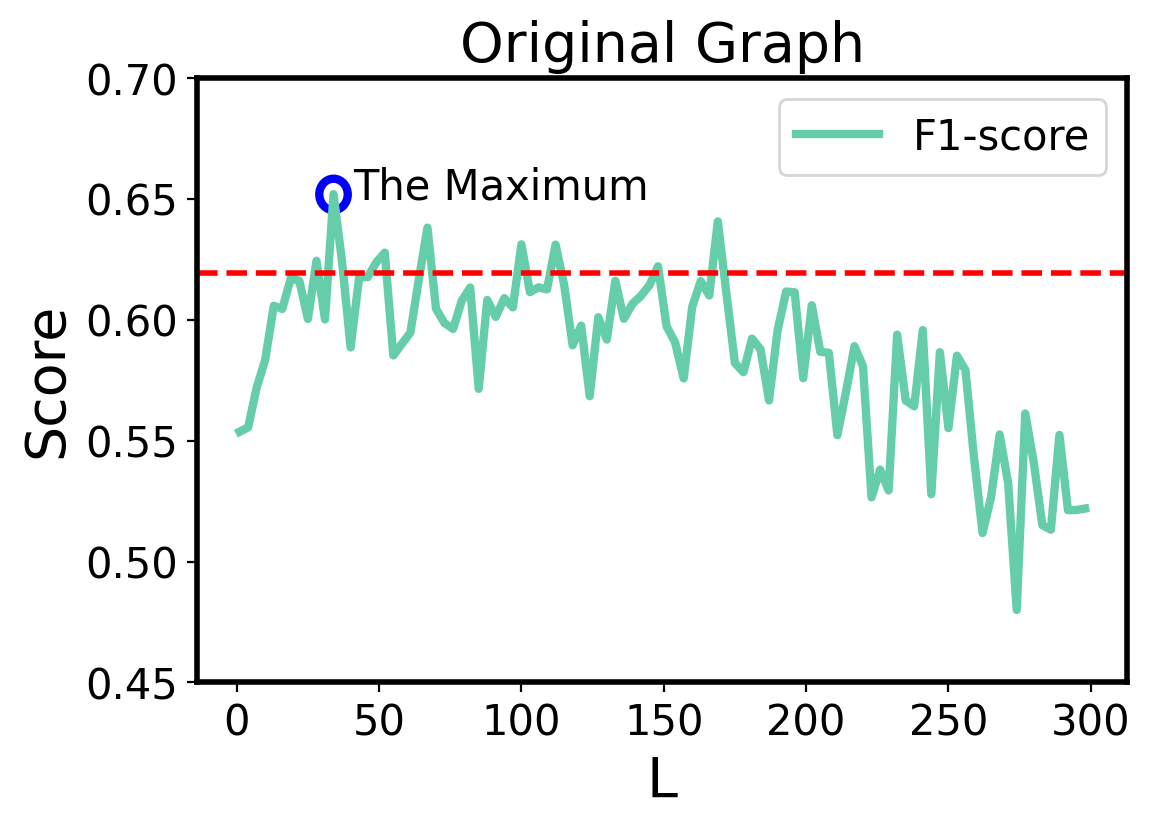

threshold: 0.6194949999999999
first L: 13.0
      L  average
0   1.0  0.55375
1   4.0  0.55560
2   7.0  0.57200
3  10.0  0.58350
4  13.0  0.60590


In [49]:
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 15

for i in range(1, 2):    
    if i == 23 or i == 82 or i == 84:
        continue        
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i] / Select one dataset
    df_total = pd.DataFrame(df_d['L'].astype(float), columns = ['L'])
    df_total['average'] = (df_d['att_1'].astype(float) + df_d['att_2'].astype(float) + df_d['att_3'].astype(float) + df_d['att_4'].astype(float))/4
    x = df_total['L']
    y = df_total['average']

    mini = np.min(df_total['average'])
    maxi = np.max(df_total['average'])
    mean = np.mean(df_total['average'])
    lb = maxi * 0.95

#     plt.figure(figsize=(20,6))

#     plt.subplot(1, 2, 1)
    plt.plot(x,y,linewidth=3, label = 'F1-score', color = "mediumaquamarine")
    plt.axhline(lb, 0, 300, color='red', linestyle='--', linewidth=2)
    plt.title('Original Graph',fontsize = 20)
    plt.ylim(0.45, 0.70) # y축 값의 범위 설정
    plt.xlabel('L',fontsize = 20)
    plt.ylabel('Score',fontsize = 20)
    plt.legend()
    
    import matplotlib.patches as patches
    shp=patches.Ellipse((34,0.652), 10, 0.013, ec='b', fc='white', lw=3)
    plt.gca().add_patch(shp)
    plt.text(41,0.65,'The Maximum')
    
    
#     plt.subplot(1, 2, 2)
#     plt.plot(x,y,linewidth=3, label = 'F1-score')
#     plt.axhline(lb, 0, 300, color='red', linestyle='--', linewidth=2)
#     plt.title('Enlarged Graph')
#     plt.ylim(mean, maxi+0.01) # y축 값의 범위 설정
#     plt.legend()

    plt.show()

    print("threshold:", lb)
    print('first L:', df_total.loc[(df_total.average<lb) & (df_total.L > 10), ][:1].iloc[0,0])
    print(df_total[df_total['average']<lb][:5])

In [32]:
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []

for i in range(1, 2):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate
df_d

<1th>


,Dataset#,L,average,smooth_3,smooth_5,ave_rate,sm3_rate,sm5_rate
0,1.0,1.0,0.553750,0.554675,0.560450,0.849180,0.886593,0.903514
1,1.0,4.0,0.555600,0.560450,0.566213,0.852017,0.895824,0.912804
2,1.0,7.0,0.572000,0.570367,0.574150,0.877166,0.911675,0.925601
3,1.0,10.0,0.583500,0.587133,0.584320,0.894801,0.938475,0.941996
4,1.0,13.0,0.605900,0.598000,0.596665,0.929152,0.955844,0.961897
...,...,...,...,...,...,...,...,...
95,1.0,286.0,0.513225,0.526917,0.528625,0.787034,0.842224,0.852209
96,1.0,289.0,0.552450,0.528992,0.524690,0.847186,0.845541,0.845865
97,1.0,292.0,0.521300,0.531717,0.526070,0.799417,0.849897,0.848090
98,1.0,295.0,0.521400,0.521558,0.529281,0.799571,0.833660,0.853267


<1th>


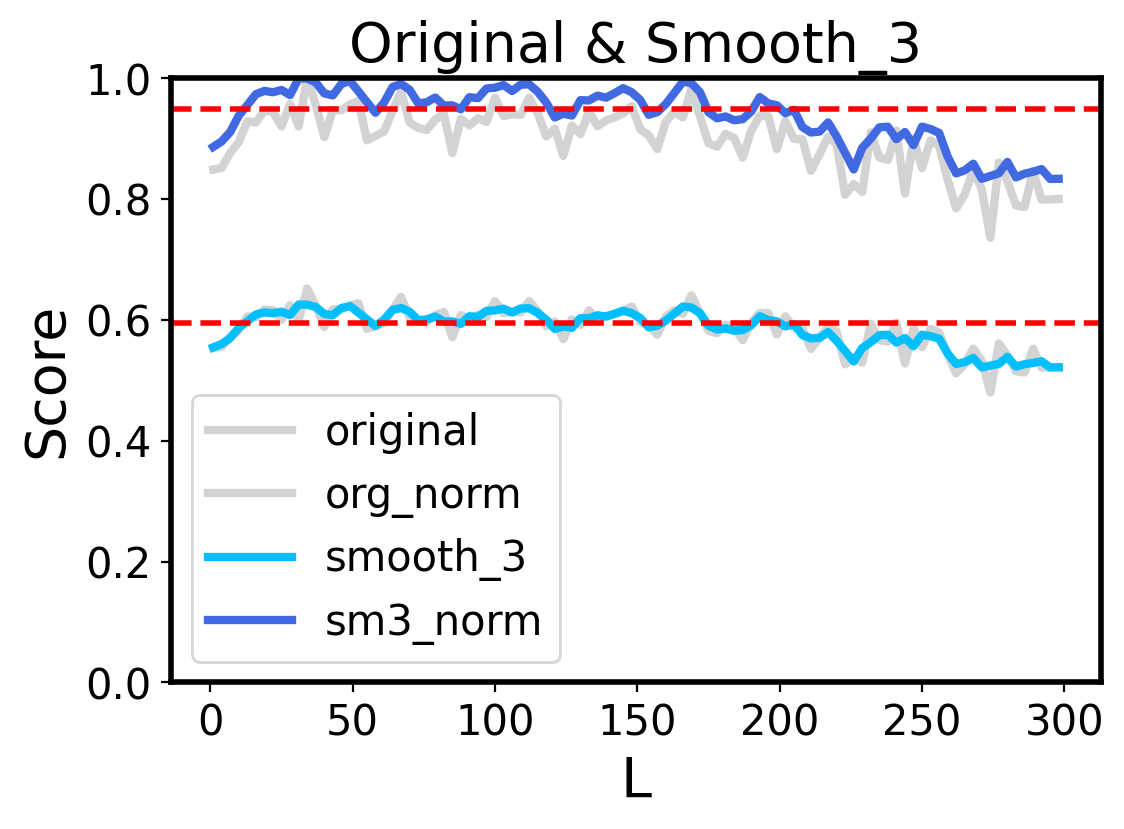

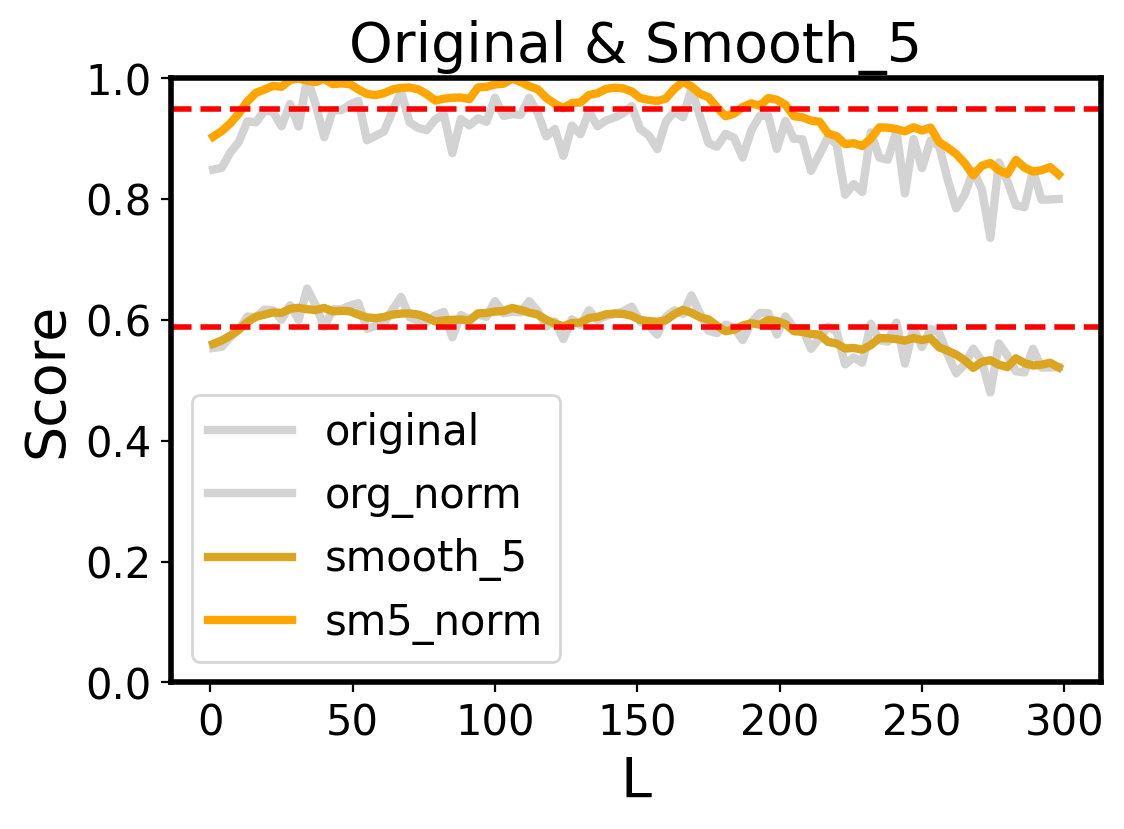

START_1: 28.0
END_1: 28.0
START_3: 13.0
END_3: 55.0
START_5: 13.0
END_5: 178.0


,dataset,start_1,end_1,start_3,end_3,start_5,end_5
0,1,28.0,28.0,13.0,55.0,13.0,178.0


In [33]:
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 15
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_1 = []
end_1 = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []

for i in range(1, 2):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate
    
#     plt.figure(figsize=(20,6))
    for k in range(2):
        if k == 0:
            plt.plot(df_d['L'],df_d['average'],linewidth=3, label = 'original', color = 'lightgray')
            plt.plot(df_d['L'],df_d['ave_rate'],linewidth=3, label = 'org_norm', color = 'lightgray')
            plt.plot(df_d['L'],df_d['smooth_3'],linewidth=3, label = 'smooth_3', color = 'deepskyblue')
            plt.plot(df_d['L'],df_d['sm3_rate'],linewidth=3, label = 'sm3_norm', color = 'royalblue')
            plt.axhline(0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.axhline(sm3_max*0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.title('Original & Smooth_3',fontsize = 20)
            plt.ylim(0, 1.0) # y축 값의 범위 설정
            plt.xlabel('L',fontsize = 20)
            plt.ylabel('Score',fontsize = 20)
            plt.legend()
            plt.show()
  
        else:
            plt.plot(df_d['L'],df_d['average'],linewidth=3, label = 'original', color = 'lightgray')
            plt.plot(df_d['L'],df_d['ave_rate'],linewidth=3, label = 'org_norm', color = 'lightgray')
            plt.plot(df_d['L'],df_d['smooth_5'],linewidth=3, label = 'smooth_5', color = 'goldenrod')
            plt.plot(df_d['L'],df_d['sm5_rate'],linewidth=3, label = 'sm5_norm', color = 'orange')
            plt.axhline(0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.axhline(sm5_max*0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.title('Original & Smooth_5',fontsize = 20)
            plt.ylim(0, 1.0) # y축 값의 범위 설정
            plt.xlabel('L',fontsize = 20)
            plt.ylabel('Score',fontsize = 20)
            plt.legend()
            plt.show()

    over_list_1 = df_d[df_d['ave_rate'] >= 0.95]["L"]    
    numlist_1 = list(range(len(over_list_1)))
    over_list_1 = pd.DataFrame(over_list_1).set_index(pd.Index(numlist_1))
    st_1 = over_list_1.iloc[0,0]
    print("START_1:", st_1)
    
    for k in range(len(over_list_1)):
        if k == len(over_list_1)-1 or over_list_1.iloc[k, 0]+3 != over_list_1.iloc[k+1, 0]:
            en_1 = over_list_1.iloc[k, 0]
            print("END_1:", en_1)
            break
            
    over_list_3 = df_d[df_d['sm3_rate'] >= 0.95]["L"]    
    numlist_3 = list(range(len(over_list_3)))
    over_list_3 = pd.DataFrame(over_list_3).set_index(pd.Index(numlist_3))
    st_3 = over_list_3.iloc[0,0]
    print("START_3:", st_3)
    
    for k in range(len(over_list_3)):
        if k == len(over_list_3)-1 or over_list_3.iloc[k, 0]+3 != over_list_3.iloc[k+1, 0]:
            en_3 = over_list_3.iloc[k, 0]
            print("END_3:", en_3)
            break
    
    over_list_5 = df_d[df_d['sm5_rate'] >= 0.95]["L"]    
    numlist_5 = list(range(len(over_list_5)))
    over_list_5 = pd.DataFrame(over_list_5).set_index(pd.Index(numlist_5))
    st_5 = over_list_5.iloc[0,0]
    print("START_5:", st_5)
    
    for k in range(len(over_list_5)):
        if k == len(over_list_5)-1 or over_list_5.iloc[k, 0]+3 != over_list_5.iloc[k+1, 0]:
            en_5 = over_list_5.iloc[k, 0]
            print("END_5:", en_5)
            break
    
    dataset.append(i)
    start_1.append(st_1)
    end_1.append(en_1)
    start_3.append(st_3)
    end_3.append(en_3)
    start_5.append(st_5)
    end_5.append(en_5)
    
res = pd.DataFrame(dataset, columns = ["dataset"])
res["start_1"] = start_1
res["end_1"] = end_1
res["start_3"] = start_3
res["end_3"] = end_3
res["start_5"] = start_5
res["end_5"] = end_5
res

<1th>
START_1: 28.0
END_1: 28.0
START_3: 13.0
END_3: 55.0
START_5: 13.0
END_5: 178.0


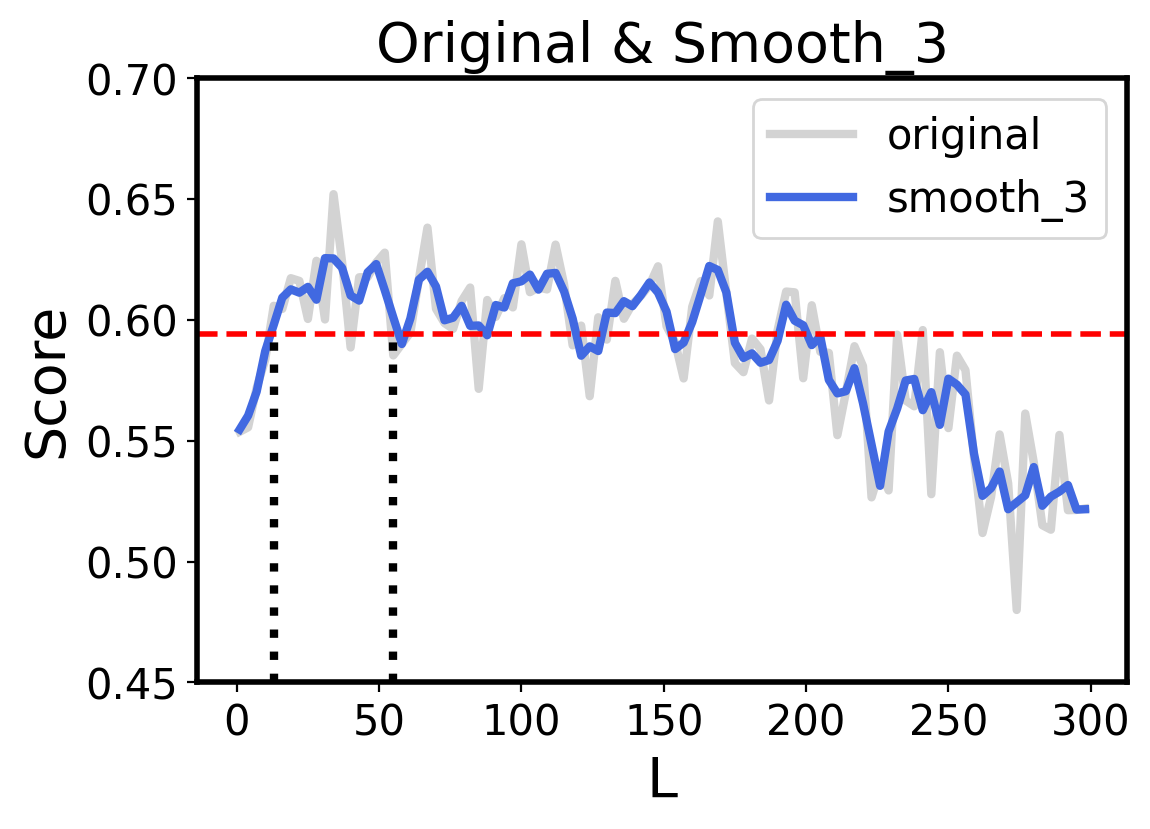

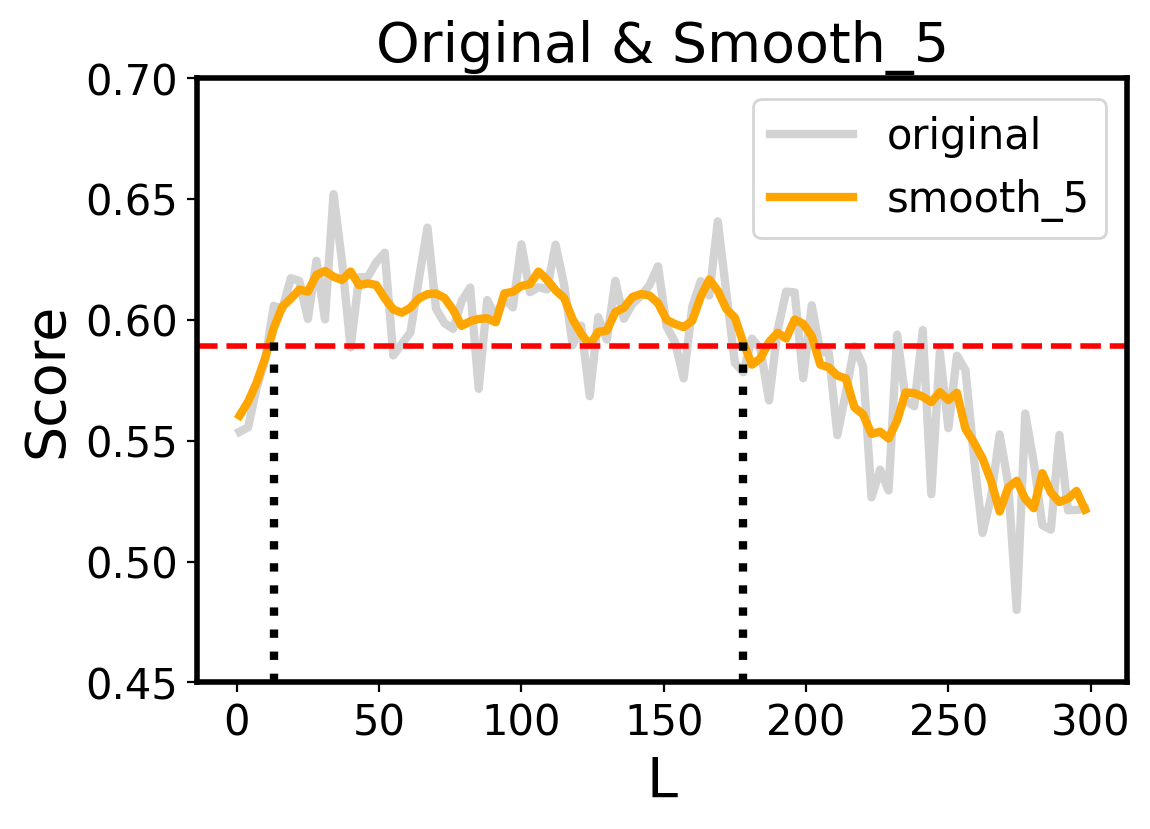

,dataset,start_1,end_1,start_3,end_3,start_5,end_5
0,1,28.0,28.0,13.0,55.0,13.0,178.0


In [58]:
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 15
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_1 = []
end_1 = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []

for i in range(1, 2):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate

    over_list_1 = df_d[df_d['ave_rate'] >= 0.95]["L"]    
    numlist_1 = list(range(len(over_list_1)))
    over_list_1 = pd.DataFrame(over_list_1).set_index(pd.Index(numlist_1))
    st_1 = over_list_1.iloc[0,0]
    print("START_1:", st_1)
    
    for k in range(len(over_list_1)):
        if k == len(over_list_1)-1 or over_list_1.iloc[k, 0]+3 != over_list_1.iloc[k+1, 0]:
            en_1 = over_list_1.iloc[k, 0]
            print("END_1:", en_1)
            break
            
    over_list_3 = df_d[df_d['sm3_rate'] >= 0.95]["L"]    
    numlist_3 = list(range(len(over_list_3)))
    over_list_3 = pd.DataFrame(over_list_3).set_index(pd.Index(numlist_3))
    st_3 = over_list_3.iloc[0,0]
    print("START_3:", st_3)
    
    for k in range(len(over_list_3)):
        if k == len(over_list_3)-1 or over_list_3.iloc[k, 0]+3 != over_list_3.iloc[k+1, 0]:
            en_3 = over_list_3.iloc[k, 0]
            print("END_3:", en_3)
            break
    
    over_list_5 = df_d[df_d['sm5_rate'] >= 0.95]["L"]    
    numlist_5 = list(range(len(over_list_5)))
    over_list_5 = pd.DataFrame(over_list_5).set_index(pd.Index(numlist_5))
    st_5 = over_list_5.iloc[0,0]
    print("START_5:", st_5)
    
    for k in range(len(over_list_5)):
        if k == len(over_list_5)-1 or over_list_5.iloc[k, 0]+3 != over_list_5.iloc[k+1, 0]:
            en_5 = over_list_5.iloc[k, 0]
            print("END_5:", en_5)
            break
    
    dataset.append(i)
    start_1.append(st_1)
    end_1.append(en_1)
    start_3.append(st_3)
    end_3.append(en_3)
    start_5.append(st_5)
    end_5.append(en_5)
    
    #     plt.figure(figsize=(20,6))
    for k in range(2):
        if k == 0:
            plt.plot(df_d['L'],df_d['average'],linewidth=3, label = 'original', color = 'lightgray')
#             plt.plot(df_d['L'],df_d['ave_rate'],linewidth=3, label = 'org_norm', color = 'lightgray')
            plt.plot(df_d['L'],df_d['smooth_3'],linewidth=3, label = 'smooth_3', color = 'royalblue')
#             plt.plot(df_d['L'],df_d['sm3_rate'],linewidth=3, label = 'sm3_norm', color = 'royalblue')
#             plt.axhline(0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.axhline(sm3_max*0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.axvline(st_3, 0.0, 0.58, color='black', linestyle=':', linewidth=3)
            plt.axvline(en_3, 0.0, 0.58, color='black', linestyle=':', linewidth=3)
            plt.title('Original & Smooth_3',fontsize = 20)
            plt.ylim(0.45, 0.70) # y축 값의 범위 설정
            plt.xlabel('L',fontsize = 20)
            plt.ylabel('Score',fontsize = 20)
            plt.legend()
            plt.show()
  
        else:
            plt.plot(df_d['L'],df_d['average'],linewidth=3, label = 'original', color = 'lightgray')
#             plt.plot(df_d['L'],df_d['ave_rate'],linewidth=3, label = 'org_norm', color = 'lightgray')
            plt.plot(df_d['L'],df_d['smooth_5'],linewidth=3, label = 'smooth_5', color = 'orange')
#             plt.plot(df_d['L'],df_d['sm5_rate'],linewidth=3, label = 'sm5_norm', color = 'orange')
#             plt.axhline(0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.axhline(sm5_max*0.95, 0, 300, color='red', linestyle='--', linewidth=2)
            plt.axvline(st_5, 0.0, 0.58, color='black', linestyle=':', linewidth=3)
            plt.axvline(en_5, 0.0, 0.58, color='black', linestyle=':', linewidth=3)
            plt.title('Original & Smooth_5',fontsize = 20)
            plt.ylim(0.45, 0.70) # y축 값의 범위 설정
            plt.xlabel('L',fontsize = 20)
            plt.ylabel('Score',fontsize = 20)
            plt.legend()
            plt.show()
    
res = pd.DataFrame(dataset, columns = ["dataset"])
res["start_1"] = start_1
res["end_1"] = end_1
res["start_3"] = start_3
res["end_3"] = end_3
res["start_5"] = start_5
res["end_5"] = end_5
res

In [59]:
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_1 = []
end_1 = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []
maxscore_001 = []

for i in range(1, 106):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    maxscore_001.append(ave_max)    # For each dataset, maximum score (this is for comparioson with other learning rates)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate

    over_list_1 = df_d[df_d['ave_rate'] >= 0.95]["L"]    
    numlist_1 = list(range(len(over_list_1)))
    over_list_1 = pd.DataFrame(over_list_1).set_index(pd.Index(numlist_1))
    st_1 = over_list_1.iloc[0,0]
    print("START_1:", st_1)
    
    for k in range(len(over_list_1)):
        if k == len(over_list_1)-1 or over_list_1.iloc[k, 0]+3 != over_list_1.iloc[k+1, 0]:
            en_1 = over_list_1.iloc[k, 0]
            print("END_1:", en_1)
            break
            
    over_list_3 = df_d[df_d['sm3_rate'] >= 0.95]["L"]    
    numlist_3 = list(range(len(over_list_3)))
    over_list_3 = pd.DataFrame(over_list_3).set_index(pd.Index(numlist_3))
    st_3 = over_list_3.iloc[0,0]
    print("START_3:", st_3)
    
    for k in range(len(over_list_3)):
        if k == len(over_list_3)-1 or over_list_3.iloc[k, 0]+3 != over_list_3.iloc[k+1, 0]:
            en_3 = over_list_3.iloc[k, 0]
            print("END_3:", en_3)
            break
    
    over_list_5 = df_d[df_d['sm5_rate'] >= 0.95]["L"]    
    numlist_5 = list(range(len(over_list_5)))
    over_list_5 = pd.DataFrame(over_list_5).set_index(pd.Index(numlist_5))
    st_5 = over_list_5.iloc[0,0]
    print("START_5:", st_5)
    
    for k in range(len(over_list_5)):
        if k == len(over_list_5)-1 or over_list_5.iloc[k, 0]+3 != over_list_5.iloc[k+1, 0]:
            en_5 = over_list_5.iloc[k, 0]
            print("END_5:", en_5)
            break
    
    dataset.append(i)
    start_1.append(st_1)
    end_1.append(en_1)
    start_3.append(st_3)
    end_3.append(en_3)
    start_5.append(st_5)
    end_5.append(en_5)
    
res = pd.DataFrame(dataset, columns = ["dataset"])
res["start_1"] = start_1
res["end_1"] = end_1
res["start_3"] = start_3
res["end_3"] = end_3
res["start_5"] = start_5
res["end_5"] = end_5
res

<1th>
START_1: 28.0
END_1: 28.0
START_3: 13.0
END_3: 55.0
START_5: 13.0
END_5: 178.0
<2th>
START_1: 25.0
END_1: 25.0
START_3: 22.0
END_3: 199.0
START_5: 19.0
END_5: 199.0
<3th>
START_1: 52.0
END_1: 52.0
START_3: 1.0
END_3: 88.0
START_5: 1.0
END_5: 109.0
<4th>
START_1: 25.0
END_1: 28.0
START_3: 22.0
END_3: 61.0
START_5: 22.0
END_5: 76.0
<5th>
START_1: 1.0
END_1: 160.0
START_3: 1.0
END_3: 157.0
START_5: 1.0
END_5: 187.0
<6th>
START_1: 16.0
END_1: 19.0
START_3: 13.0
END_3: 22.0
START_5: 13.0
END_5: 25.0
<7th>
START_1: 1.0
END_1: 67.0
START_3: 1.0
END_3: 151.0
START_5: 1.0
END_5: 154.0
<8th>
START_1: 121.0
END_1: 121.0
START_3: 16.0
END_3: 16.0
START_5: 19.0
END_5: 40.0
<9th>
START_1: 22.0
END_1: 25.0
START_3: 22.0
END_3: 37.0
START_5: 19.0
END_5: 55.0
<10th>
START_1: 10.0
END_1: 16.0
START_3: 10.0
END_3: 130.0
START_5: 10.0
END_5: 172.0
<11th>
START_1: 13.0
END_1: 58.0
START_3: 13.0
END_3: 55.0
START_5: 13.0
END_5: 55.0
<12th>
START_1: 4.0
END_1: 106.0
START_3: 4.0
END_3: 109.0
START_5: 1

,dataset,start_1,end_1,start_3,end_3,start_5,end_5
0,1,28.0,28.0,13.0,55.0,13.0,178.0
1,2,25.0,25.0,22.0,199.0,19.0,199.0
2,3,52.0,52.0,1.0,88.0,1.0,109.0
3,4,25.0,28.0,22.0,61.0,22.0,76.0
4,5,1.0,160.0,1.0,157.0,1.0,187.0
...,...,...,...,...,...,...,...
97,101,4.0,43.0,7.0,64.0,4.0,61.0
98,102,7.0,61.0,7.0,58.0,10.0,64.0
99,103,7.0,49.0,7.0,61.0,4.0,64.0
100,104,10.0,28.0,10.0,31.0,10.0,31.0


In [60]:
# 각 L[1, 300]에 대해서 몇 개의 데이터셋에 대해서 유효한지 
counts = pd.DataFrame(list(range(1, 301)), columns=["L"])
counts["count_1"] = 0
counts["count_3"] = 0
counts["count_5"] = 0
counts

,L,count_1,count_3,count_5
0,1,0,0,0
1,2,0,0,0
2,3,0,0,0
3,4,0,0,0
4,5,0,0,0
...,...,...,...,...
295,296,0,0,0
296,297,0,0,0
297,298,0,0,0
298,299,0,0,0


In [61]:
for i in range(len(res)):
    x_1 = list(range(int(list(res["start_1"])[i]), int(list(res["end_1"])[i])))
    x_3 = list(range(int(list(res["start_3"])[i]), int(list(res["end_3"])[i])))
    x_5 = list(range(int(list(res["start_5"])[i]), int(list(res["end_5"])[i])))
    for j in range(len(counts)):
        if counts["L"][j] in x_1:
            counts["count_1"][j] += 1
        if counts["L"][j] in x_3:
            counts["count_3"][j] += 1
        if counts["L"][j] in x_5:
            counts["count_5"][j] += 1
counts

,L,count_1,count_3,count_5
0,1,9,15,22
1,2,9,15,22
2,3,9,15,22
3,4,21,20,28
4,5,21,20,28
...,...,...,...,...
295,296,0,0,0
296,297,0,0,0
297,298,0,0,0
298,299,0,0,0


In [62]:
counts.sort_values('count_1', ascending = False)[:10]

,L,count_1,count_3,count_5
16,17,58,78,83
20,21,58,79,89
19,20,58,79,89
18,19,58,79,89
17,18,58,78,83
15,16,58,78,83
23,24,57,81,90
22,23,57,81,90
21,22,57,81,90
26,27,56,79,91


In [63]:
counts.sort_values('count_3', ascending = False)[:10]

,L,count_1,count_3,count_5
21,22,57,81,90
22,23,57,81,90
23,24,57,81,90
25,26,56,79,91
26,27,56,79,91
18,19,58,79,89
24,25,56,79,91
20,21,58,79,89
19,20,58,79,89
27,28,53,79,89


In [64]:
counts.sort_values('count_5', ascending = False)[:10]

,L,count_1,count_3,count_5
26,27,56,79,91
24,25,56,79,91
25,26,56,79,91
21,22,57,81,90
22,23,57,81,90
23,24,57,81,90
27,28,53,79,89
20,21,58,79,89
28,29,53,79,89
18,19,58,79,89


In [66]:
counts[14:28]

,L,count_1,count_3,count_5
14,15,55,71,73
15,16,58,78,83
16,17,58,78,83
17,18,58,78,83
18,19,58,79,89
19,20,58,79,89
20,21,58,79,89
21,22,57,81,90
22,23,57,81,90
23,24,57,81,90


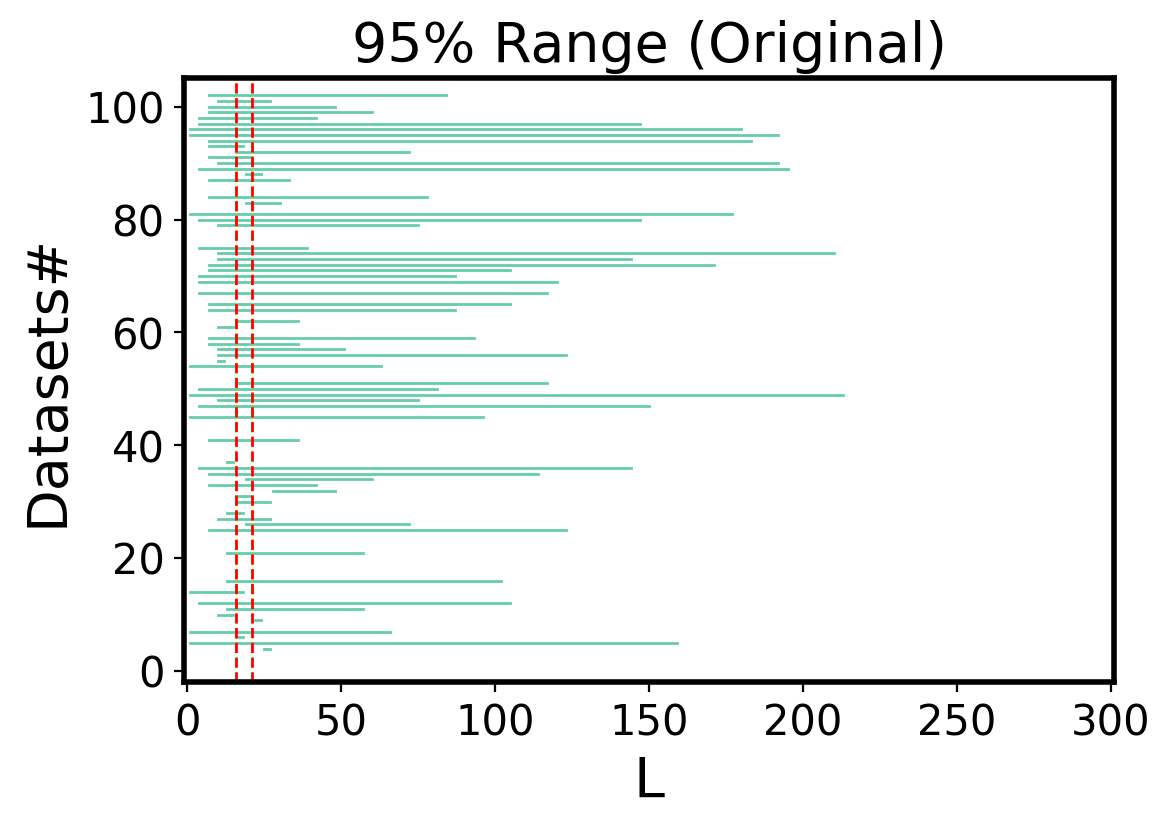

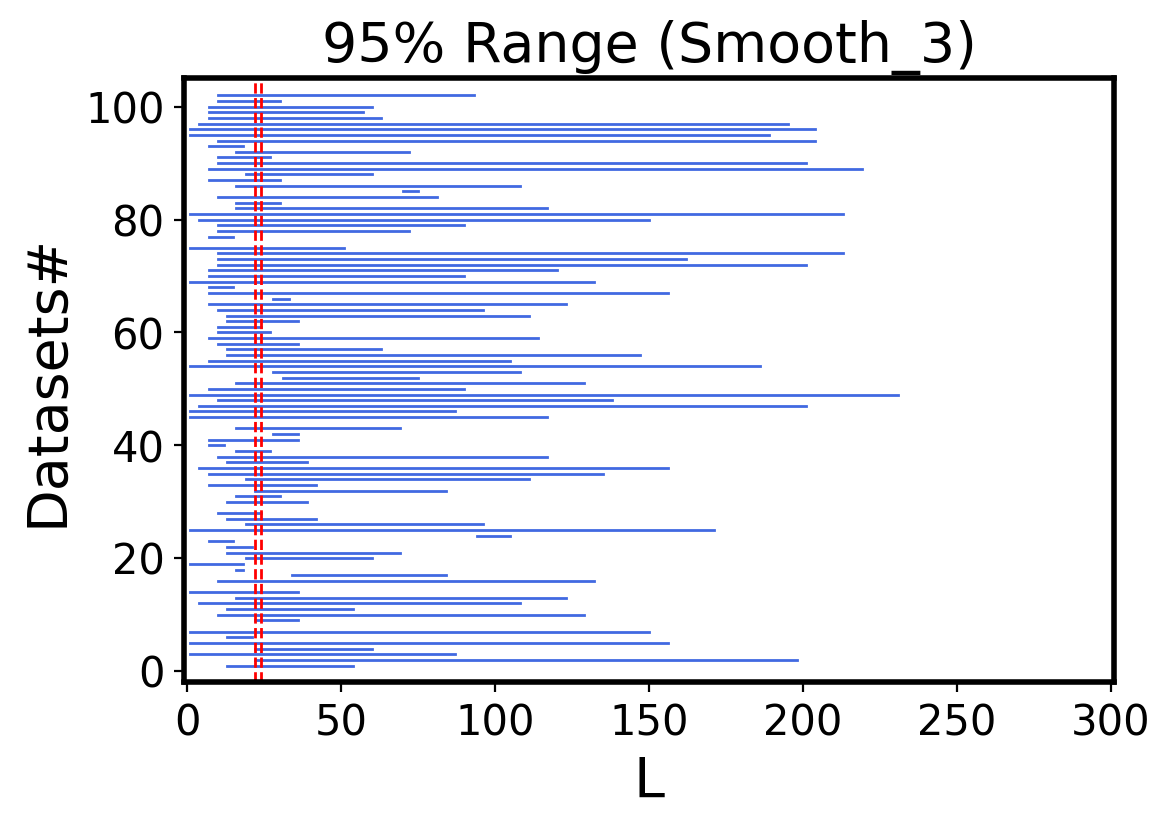

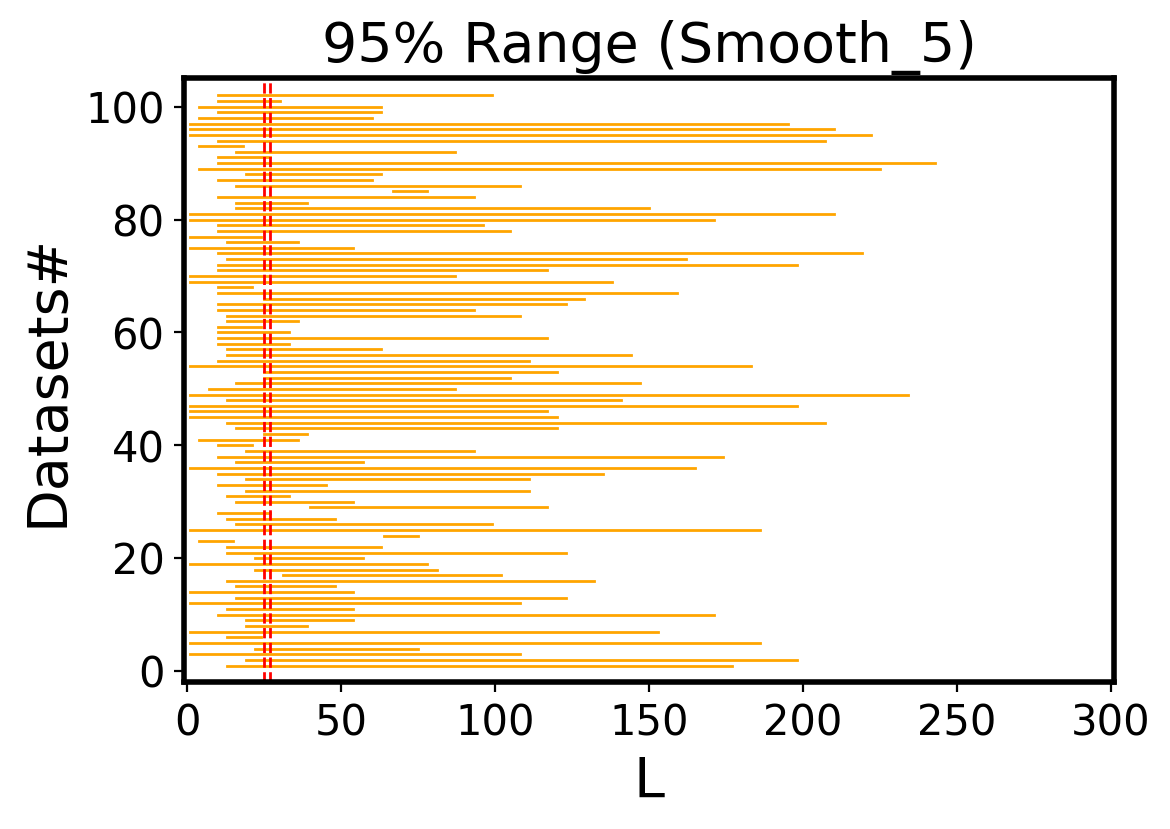

In [42]:
# original
# plt.figure(figsize=(20,20))
for i in range(len(res)):
    x = list(range(int(list(res["start_1"])[i]), int(list(res["end_1"])[i])))
    y = [i+1 for j in range(len(x))]
    plt.plot(x,y,linewidth=1, color = "mediumaquamarine")
plt.title('95% Range (Original)')
plt.axvline(16, color='red', linestyle='--', linewidth=1)
plt.axvline(21, color='red', linestyle='--', linewidth=1)
plt.xlabel('L')
plt.ylabel('Datasets#')
plt.xlim(-1, 301) # x축 값의 범위 설정
plt.ylim(-2, 105) # y축 값의 범위 설정
plt.show()

# Smooth3
# plt.figure(figsize=(20,20))
for i in range(len(res)):
    x = list(range(int(list(res["start_3"])[i]), int(list(res["end_3"])[i])))
    y = [i+1 for j in range(len(x))]
    plt.plot(x,y,linewidth=1, color = "royalblue")
plt.title('95% Range (Smooth_3)')
plt.axvline(22, color='red', linestyle='--', linewidth=1)
plt.axvline(24, color='red', linestyle='--', linewidth=1)
plt.xlabel('L')
plt.ylabel('Datasets#')
plt.xlim(-1, 301) # x축 값의 범위 설정
plt.ylim(-2, 105) # y축 값의 범위 설정
plt.show()

# Smooth5
# plt.figure(figsize=(20,20))
for i in range(len(res)):
    x = list(range(int(list(res["start_5"])[i]), int(list(res["end_5"])[i])))
    y = [i+1 for j in range(len(x))]
    plt.plot(x,y,linewidth=1, color = "orange")
plt.title('95% Range (Smooth_5)')
plt.axvline(25, color='red', linestyle='--', linewidth=1)
plt.axvline(27, color='red', linestyle='--', linewidth=1)
plt.xlabel('L')
plt.ylabel('Datasets#')
plt.xlim(-1, 301) # x축 값의 범위 설정
plt.ylim(-2, 105) # y축 값의 범위 설정
plt.show()

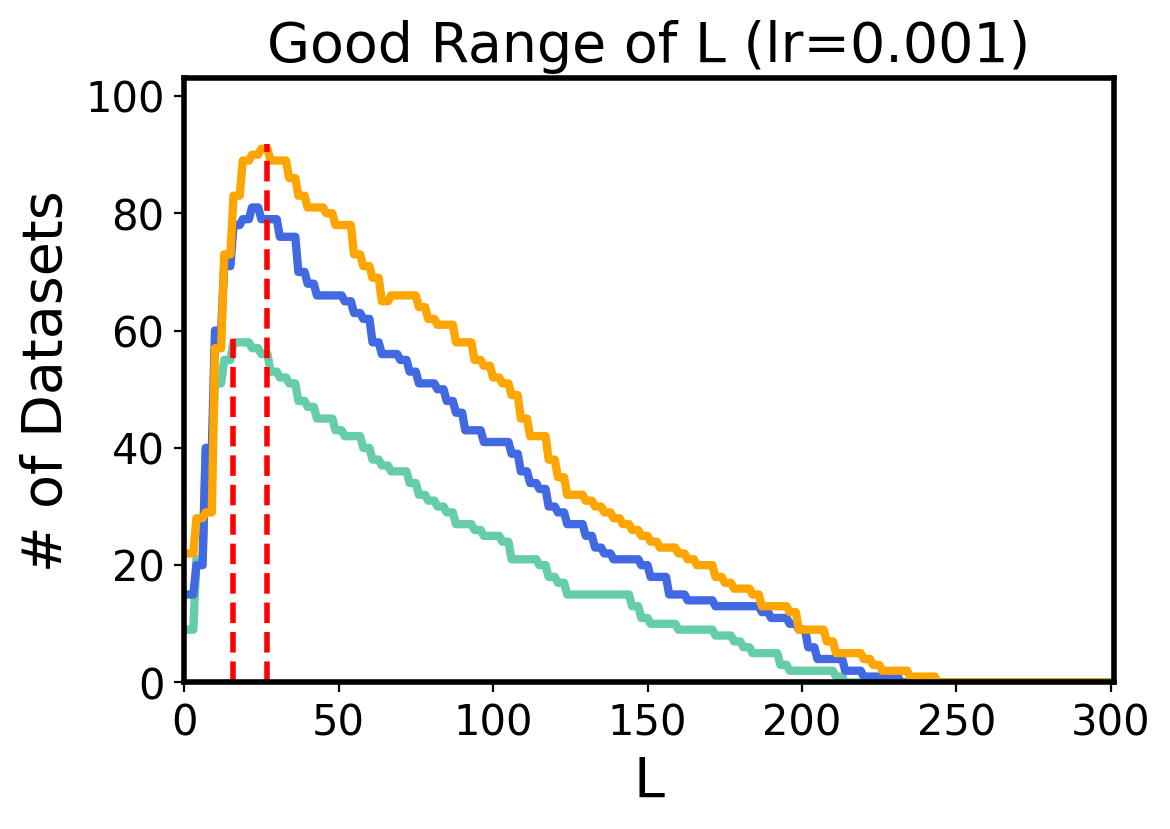

In [43]:
x = counts["L"]
y1 = counts["count_1"]
y3 = counts["count_3"]
y5 = counts["count_5"]

plt.plot(x,y1,linewidth=3, color = 'mediumaquamarine')
plt.plot(x,y3,linewidth=3, color = 'royalblue')
plt.plot(x,y5,linewidth=3, color = 'orange')
plt.title('Good Range of L (lr=0.001)')
plt.axvline(16, 0, 58/102, color='red', linestyle='--', linewidth=2)
# plt.axvline(22, 0, 81/102, color='red', linestyle='--', linewidth=2)
plt.axvline(27, 0, 91/102, color='red', linestyle='--', linewidth=2)
plt.xlabel('L')
plt.ylabel('# of Datasets')
plt.xlim(0, 301) # x축 값의 범위 설정
plt.ylim(0, 103) # y축 값의 범위 설정
plt.show()

# lr = 0.01

In [44]:
df = pd.read_csv("5CV_MLP_102_L1to4_0_01.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,Dataset#,L,att_1,att_2,att_3,att_4
0,1,1,0.68,0.6895,0.6716,0.6817
1,1,4,0.6418,0.6646,0.6594,0.6707
2,1,7,0.6577,0.6728,0.6707,0.6634
3,1,10,0.6675,0.6653,0.6585,0.6651
4,1,13,0.6713,0.6609,0.6622,0.6584
...,...,...,...,...,...,...
10296,105,286,0.7341,0.7435,0.5638,0.374
10297,105,289,0.5644,0.5588,0.559,0.9324
10298,105,292,0.3762,0.4826,0.5506,0.1843
10299,105,295,0.4161,0.7466,0.3644,0.3688


In [45]:
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_1 = []
end_1 = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []
maxscore_01 = []

for i in range(1, 106):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    maxscore_01.append(ave_max)    # For each dataset, maximum score (this is for comparioson with other learning rates)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate

    over_list_1 = df_d[df_d['ave_rate'] >= 0.95]["L"]    
    numlist_1 = list(range(len(over_list_1)))
    over_list_1 = pd.DataFrame(over_list_1).set_index(pd.Index(numlist_1))
    st_1 = over_list_1.iloc[0,0]
    print("START_1:", st_1)
    
    for k in range(len(over_list_1)):
        if k == len(over_list_1)-1 or over_list_1.iloc[k, 0]+3 != over_list_1.iloc[k+1, 0]:
            en_1 = over_list_1.iloc[k, 0]
            print("END_1:", en_1)
            break
            
    over_list_3 = df_d[df_d['sm3_rate'] >= 0.95]["L"]    
    numlist_3 = list(range(len(over_list_3)))
    over_list_3 = pd.DataFrame(over_list_3).set_index(pd.Index(numlist_3))
    st_3 = over_list_3.iloc[0,0]
    print("START_3:", st_3)
    
    for k in range(len(over_list_3)):
        if k == len(over_list_3)-1 or over_list_3.iloc[k, 0]+3 != over_list_3.iloc[k+1, 0]:
            en_3 = over_list_3.iloc[k, 0]
            print("END_3:", en_3)
            break
    
    over_list_5 = df_d[df_d['sm5_rate'] >= 0.95]["L"]    
    numlist_5 = list(range(len(over_list_5)))
    over_list_5 = pd.DataFrame(over_list_5).set_index(pd.Index(numlist_5))
    st_5 = over_list_5.iloc[0,0]
    print("START_5:", st_5)
    
    for k in range(len(over_list_5)):
        if k == len(over_list_5)-1 or over_list_5.iloc[k, 0]+3 != over_list_5.iloc[k+1, 0]:
            en_5 = over_list_5.iloc[k, 0]
            print("END_5:", en_5)
            break
    
    dataset.append(i)
    start_1.append(st_1)
    end_1.append(en_1)
    start_3.append(st_3)
    end_3.append(en_3)
    start_5.append(st_5)
    end_5.append(en_5)
    
res = pd.DataFrame(dataset, columns = ["dataset"])
res["start_1"] = start_1
res["end_1"] = end_1
res["start_3"] = start_3
res["end_3"] = end_3
res["start_5"] = start_5
res["end_5"] = end_5
res

<1th>
START_1: 1.0
END_1: 28.0
START_3: 1.0
END_3: 34.0
START_5: 1.0
END_5: 34.0
<2th>
START_1: 4.0
END_1: 46.0
START_3: 1.0
END_3: 46.0
START_5: 1.0
END_5: 49.0
<3th>
START_1: 13.0
END_1: 22.0
START_3: 7.0
END_3: 49.0
START_5: 7.0
END_5: 88.0
<4th>
START_1: 1.0
END_1: 49.0
START_3: 1.0
END_3: 49.0
START_5: 1.0
END_5: 49.0
<5th>
START_1: 4.0
END_1: 10.0
START_3: 1.0
END_3: 175.0
START_5: 1.0
END_5: 199.0
<6th>
START_1: 1.0
END_1: 7.0
START_3: 1.0
END_3: 7.0
START_5: 1.0
END_5: 4.0
<7th>
START_1: 1.0
END_1: 4.0
START_3: 1.0
END_3: 28.0
START_5: 1.0
END_5: 223.0
<8th>
START_1: 4.0
END_1: 40.0
START_3: 1.0
END_3: 43.0
START_5: 1.0
END_5: 43.0
<9th>
START_1: 7.0
END_1: 34.0
START_3: 4.0
END_3: 43.0
START_5: 1.0
END_5: 52.0
<10th>
START_1: 1.0
END_1: 28.0
START_3: 1.0
END_3: 151.0
START_5: 1.0
END_5: 154.0
<11th>
START_1: 1.0
END_1: 52.0
START_3: 1.0
END_3: 67.0
START_5: 1.0
END_5: 70.0
<12th>
START_1: 1.0
END_1: 127.0
START_3: 1.0
END_3: 130.0
START_5: 1.0
END_5: 163.0
<13th>
START_1: 1.0


,dataset,start_1,end_1,start_3,end_3,start_5,end_5
0,1,1.0,28.0,1.0,34.0,1.0,34.0
1,2,4.0,46.0,1.0,46.0,1.0,49.0
2,3,13.0,22.0,7.0,49.0,7.0,88.0
3,4,1.0,49.0,1.0,49.0,1.0,49.0
4,5,4.0,10.0,1.0,175.0,1.0,199.0
...,...,...,...,...,...,...,...
97,101,4.0,64.0,4.0,73.0,1.0,76.0
98,102,1.0,97.0,1.0,124.0,1.0,124.0
99,103,1.0,94.0,1.0,115.0,1.0,121.0
100,104,1.0,73.0,1.0,79.0,1.0,79.0


In [46]:
# 각 L[1, 300]에 대해서 몇 개의 데이터셋에 대해서 유효한지 
counts = pd.DataFrame(list(range(1, 301)), columns=["L"])
counts["count_1"] = 0
counts["count_3"] = 0
counts["count_5"] = 0
for i in range(len(res)):
    x_1 = list(range(int(list(res["start_1"])[i]), int(list(res["end_1"])[i])))
    x_3 = list(range(int(list(res["start_3"])[i]), int(list(res["end_3"])[i])))
    x_5 = list(range(int(list(res["start_5"])[i]), int(list(res["end_5"])[i])))
    for j in range(len(counts)):
        if counts["L"][j] in x_1:
            counts["count_1"][j] += 1
        if counts["L"][j] in x_3:
            counts["count_3"][j] += 1
        if counts["L"][j] in x_5:
            counts["count_5"][j] += 1
counts

,L,count_1,count_3,count_5
0,1,53,72,80
1,2,53,72,80
2,3,53,72,80
3,4,76,78,81
4,5,76,78,81
...,...,...,...,...
295,296,0,0,0
296,297,0,0,0
297,298,0,0,0
298,299,0,0,0


In [47]:
counts.sort_values('count_1', ascending = False)[:10]

,L,count_1,count_3,count_5
6,7,79,84,83
7,8,79,84,83
8,9,79,84,83
10,11,78,89,92
11,12,78,89,92
14,15,78,89,92
13,14,78,89,92
9,10,78,89,92
12,13,78,89,92
16,17,76,88,92


In [48]:
counts.sort_values('count_3', ascending = False)[:10]

,L,count_1,count_3,count_5
14,15,78,89,92
9,10,78,89,92
10,11,78,89,92
11,12,78,89,92
12,13,78,89,92
13,14,78,89,92
17,18,76,88,92
16,17,76,88,92
15,16,76,88,92
19,20,72,87,90


In [49]:
counts.sort_values('count_5', ascending = False)[:10]

,L,count_1,count_3,count_5
15,16,76,88,92
17,18,76,88,92
14,15,78,89,92
13,14,78,89,92
12,13,78,89,92
11,12,78,89,92
10,11,78,89,92
9,10,78,89,92
16,17,76,88,92
21,22,71,86,90


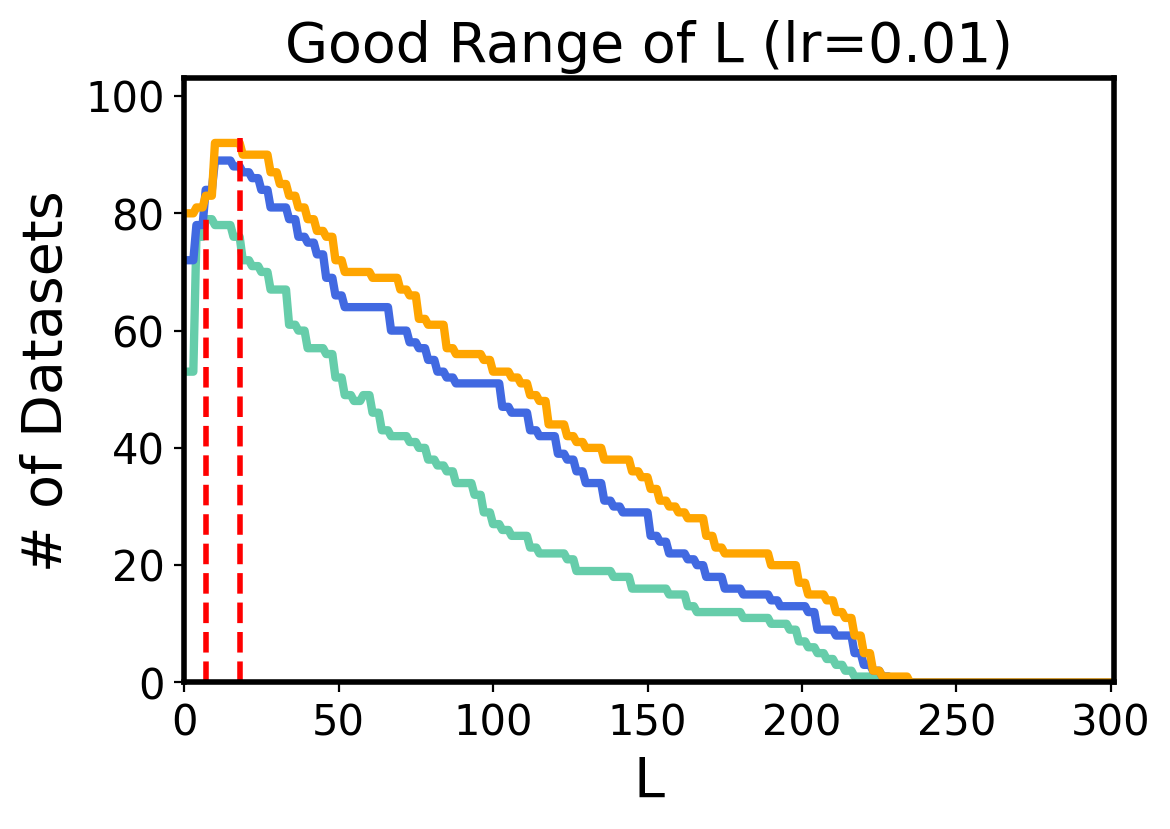

In [50]:
x = counts["L"]
y1 = counts["count_1"]
y3 = counts["count_3"]
y5 = counts["count_5"]

plt.plot(x,y1,linewidth=3, color = 'mediumaquamarine')
plt.plot(x,y3,linewidth=3, color = 'royalblue')
plt.plot(x,y5,linewidth=3, color = 'orange')
plt.title('Good Range of L (lr=0.01)')
plt.axvline(7, 0, 79/102, color='red', linestyle='--', linewidth=2)
# plt.axvline(11, 0, 89/102, color='red', linestyle='--', linewidth=2)
plt.axvline(18, 0, 92/102, color='red', linestyle='--', linewidth=2)
plt.xlabel('L')
plt.ylabel('# of Datasets')
plt.xlim(0, 301) # x축 값의 범위 설정
plt.ylim(0, 103) # y축 값의 범위 설정
plt.show()

# lr = 0.1

In [51]:
df = pd.read_csv("5CV_MLP_102_L1to4_0_1.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,Dataset#,L,att_1,att_2,att_3,att_4
0,1,1,0.6798,0.6613,0.6904,0.6912
1,1,4,0.6572,0.6709,0.6842,0.6766
2,1,7,0.6662,0.6566,0.6519,0.6674
3,1,10,0.669,0.6791,0.6692,0.6868
4,1,13,0.6164,0.6807,0.6437,0.6862
...,...,...,...,...,...,...
10296,105,286,0.1757,0.05578,0.0558,0
10297,105,289,0,0,0,0
10298,105,292,0,0.05578,0.05578,0.0558
10299,105,295,0,0,0,0


In [52]:
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_1 = []
end_1 = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []
maxscore_1 = []

for i in range(1, 106):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    maxscore_1.append(ave_max)    # For each dataset, maximum score (this is for comparioson with other learning rates)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate

    over_list_1 = df_d[df_d['ave_rate'] >= 0.95]["L"]    
    numlist_1 = list(range(len(over_list_1)))
    over_list_1 = pd.DataFrame(over_list_1).set_index(pd.Index(numlist_1))
    st_1 = over_list_1.iloc[0,0]
    print("START_1:", st_1)
    
    for k in range(len(over_list_1)):
        if k == len(over_list_1)-1 or over_list_1.iloc[k, 0]+3 != over_list_1.iloc[k+1, 0]:
            en_1 = over_list_1.iloc[k, 0]
            print("END_1:", en_1)
            break
            
    over_list_3 = df_d[df_d['sm3_rate'] >= 0.95]["L"]    
    numlist_3 = list(range(len(over_list_3)))
    over_list_3 = pd.DataFrame(over_list_3).set_index(pd.Index(numlist_3))
    st_3 = over_list_3.iloc[0,0]
    print("START_3:", st_3)
    
    for k in range(len(over_list_3)):
        if k == len(over_list_3)-1 or over_list_3.iloc[k, 0]+3 != over_list_3.iloc[k+1, 0]:
            en_3 = over_list_3.iloc[k, 0]
            print("END_3:", en_3)
            break
    
    over_list_5 = df_d[df_d['sm5_rate'] >= 0.95]["L"]    
    numlist_5 = list(range(len(over_list_5)))
    over_list_5 = pd.DataFrame(over_list_5).set_index(pd.Index(numlist_5))
    st_5 = over_list_5.iloc[0,0]
    print("START_5:", st_5)
    
    for k in range(len(over_list_5)):
        if k == len(over_list_5)-1 or over_list_5.iloc[k, 0]+3 != over_list_5.iloc[k+1, 0]:
            en_5 = over_list_5.iloc[k, 0]
            print("END_5:", en_5)
            break
    
    dataset.append(i)
    start_1.append(st_1)
    end_1.append(en_1)
    start_3.append(st_3)
    end_3.append(en_3)
    start_5.append(st_5)
    end_5.append(en_5)
    
res = pd.DataFrame(dataset, columns = ["dataset"])
res["start_1"] = start_1
res["end_1"] = end_1
res["start_3"] = start_3
res["end_3"] = end_3
res["start_5"] = start_5
res["end_5"] = end_5
res

<1th>
START_1: 1.0
END_1: 16.0
START_3: 1.0
END_3: 16.0
START_5: 1.0
END_5: 16.0
<2th>
START_1: 4.0
END_1: 16.0
START_3: 1.0
END_3: 19.0
START_5: 1.0
END_5: 22.0
<3th>
START_1: 4.0
END_1: 10.0
START_3: 4.0
END_3: 13.0
START_5: 1.0
END_5: 16.0
<4th>
START_1: 1.0
END_1: 16.0
START_3: 1.0
END_3: 16.0
START_5: 1.0
END_5: 16.0
<5th>
START_1: 1.0
END_1: 91.0
START_3: 1.0
END_3: 142.0
START_5: 1.0
END_5: 142.0
<6th>
START_1: 1.0
END_1: 4.0
START_3: 1.0
END_3: 1.0
START_5: 1.0
END_5: 7.0
<7th>
START_1: 1.0
END_1: 1.0
START_3: 16.0
END_3: 145.0
START_5: 16.0
END_5: 178.0
<8th>
START_1: 4.0
END_1: 10.0
START_3: 1.0
END_3: 16.0
START_5: 1.0
END_5: 22.0
<9th>
START_1: 4.0
END_1: 22.0
START_3: 1.0
END_3: 22.0
START_5: 1.0
END_5: 19.0
<10th>
START_1: 1.0
END_1: 16.0
START_3: 1.0
END_3: 19.0
START_5: 1.0
END_5: 22.0
<11th>
START_1: 1.0
END_1: 19.0
START_3: 1.0
END_3: 22.0
START_5: 1.0
END_5: 22.0
<12th>
START_1: 1.0
END_1: 40.0
START_3: 1.0
END_3: 40.0
START_5: 1.0
END_5: 40.0
<13th>
START_1: 1.0
END

,dataset,start_1,end_1,start_3,end_3,start_5,end_5
0,1,1.0,16.0,1.0,16.0,1.0,16.0
1,2,4.0,16.0,1.0,19.0,1.0,22.0
2,3,4.0,10.0,4.0,13.0,1.0,16.0
3,4,1.0,16.0,1.0,16.0,1.0,16.0
4,5,1.0,91.0,1.0,142.0,1.0,142.0
...,...,...,...,...,...,...,...
97,101,4.0,7.0,1.0,25.0,1.0,28.0
98,102,1.0,34.0,1.0,37.0,1.0,37.0
99,103,1.0,34.0,1.0,31.0,1.0,31.0
100,104,1.0,25.0,1.0,25.0,1.0,22.0


In [53]:
# 각 L[1, 300]에 대해서 몇 개의 데이터셋에 대해서 유효한지 
counts = pd.DataFrame(list(range(1, 301)), columns=["L"])
counts["count_1"] = 0
counts["count_3"] = 0
counts["count_5"] = 0
for i in range(len(res)):
    x_1 = list(range(int(list(res["start_1"])[i]), int(list(res["end_1"])[i])))
    x_3 = list(range(int(list(res["start_3"])[i]), int(list(res["end_3"])[i])))
    x_5 = list(range(int(list(res["start_5"])[i]), int(list(res["end_5"])[i])))
    for j in range(len(counts)):
        if counts["L"][j] in x_1:
            counts["count_1"][j] += 1
        if counts["L"][j] in x_3:
            counts["count_3"][j] += 1
        if counts["L"][j] in x_5:
            counts["count_5"][j] += 1
counts

,L,count_1,count_3,count_5
0,1,59,84,94
1,2,59,84,94
2,3,59,84,94
3,4,83,90,96
4,5,83,90,96
...,...,...,...,...
295,296,0,0,0
296,297,0,0,0
297,298,0,0,0
298,299,0,0,0


In [54]:
counts.sort_values('count_1', ascending = False)[:10]

,L,count_1,count_3,count_5
3,4,83,90,96
4,5,83,90,96
5,6,83,90,96
6,7,83,94,97
7,8,83,94,97
8,9,83,94,97
9,10,78,91,95
10,11,78,91,95
11,12,78,91,95
12,13,69,87,93


In [55]:
counts.sort_values('count_3', ascending = False)[:10]

,L,count_1,count_3,count_5
6,7,83,94,97
7,8,83,94,97
8,9,83,94,97
9,10,78,91,95
10,11,78,91,95
11,12,78,91,95
3,4,83,90,96
4,5,83,90,96
5,6,83,90,96
12,13,69,87,93


In [56]:
counts.sort_values('count_5', ascending = False)[:10]

,L,count_1,count_3,count_5
6,7,83,94,97
7,8,83,94,97
8,9,83,94,97
3,4,83,90,96
4,5,83,90,96
5,6,83,90,96
10,11,78,91,95
11,12,78,91,95
9,10,78,91,95
0,1,59,84,94


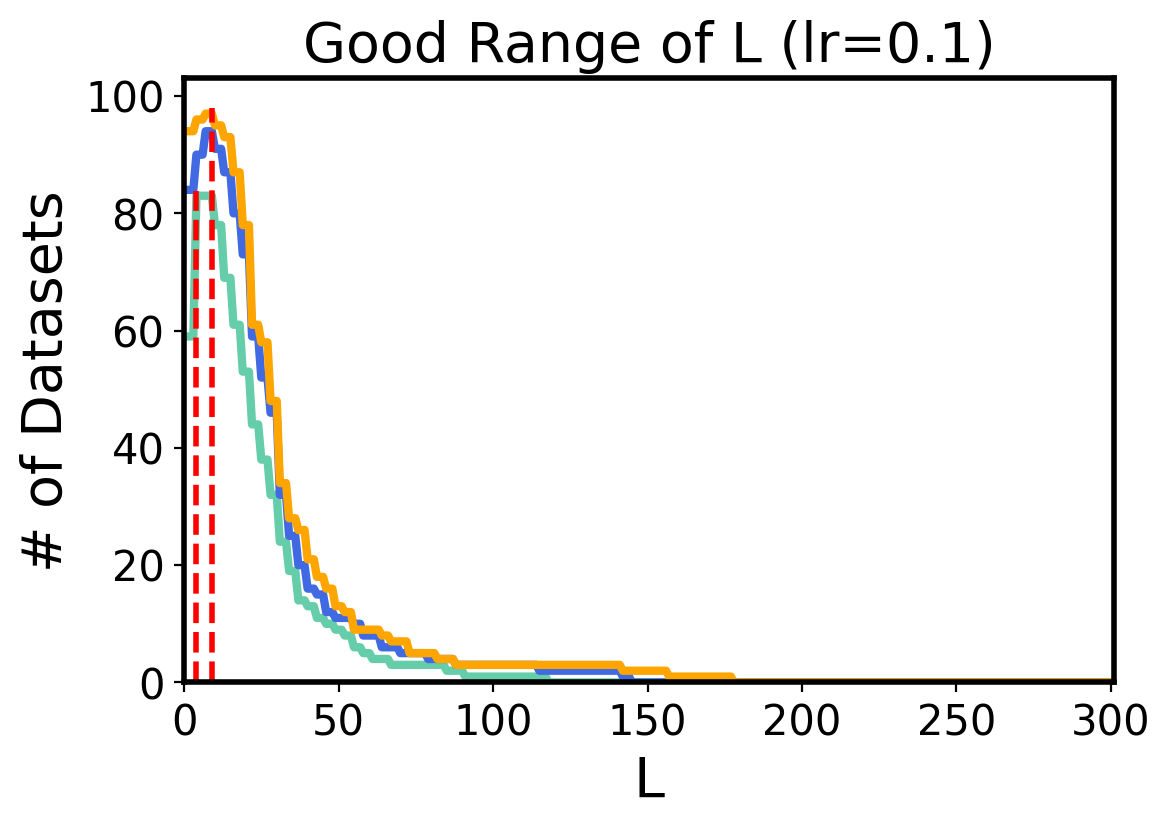

In [57]:
x = counts["L"]
y1 = counts["count_1"]
y3 = counts["count_3"]
y5 = counts["count_5"]

plt.plot(x,y1,linewidth=3, color = 'mediumaquamarine')
plt.plot(x,y3,linewidth=3, color = 'royalblue')
plt.plot(x,y5,linewidth=3, color = 'orange')
plt.title('Good Range of L (lr=0.1)')
plt.axvline(4, 0, 83/102, color='red', linestyle='--', linewidth=2)
# plt.axvline(7, 0, 94/102, color='red', linestyle='--', linewidth=2)
plt.axvline(9, 0, 97/102, color='red', linestyle='--', linewidth=2)
plt.xlabel('L')
plt.ylabel('# of Datasets')
plt.xlim(0, 301) # x축 값의 범위 설정
plt.ylim(0, 103) # y축 값의 범위 설정
plt.show()

###### Comparison max scores of each dataset with different learning rate
comp = pd.DataFrame(maxscore_001, columns = ["0.001"])
comp["0.01"] = maxscore_01
comp["0.1"] = maxscore_1
comp

In [242]:
print(np.mean(maxscore_001), np.mean(maxscore_01), np.mean(maxscore_1))

0.6546289215686274 0.6824936274509801 0.6778693627450979


# lr = 0.0001

In [69]:
df = pd.read_csv("5CV_MLP_102_L1to4_0_0001.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,Dataset#,L,att_1,att_2,att_3,att_4
0,1,1,0.3164,0.4892,0.3041,0.4107
1,1,4,0.3432,0.3565,0.3184,0.3378
2,1,7,0.4235,0.5045,0.2299,0.4032
3,1,10,0.2392,0.4256,0.2984,0.3921
4,1,13,0.3592,0.4267,0.3722,0.3176
...,...,...,...,...,...,...
10296,105,286,0.3407,0.2974,0.2423,0.2513
10297,105,289,0.3159,0.3312,0.2968,0.1855
10298,105,292,0.2836,0.3519,0.1415,0.3131
10299,105,295,0.4021,0.212,0.4126,0.4173


In [70]:
# 오리지널 데이터 smoothing 먼저하고, 그다음 rate 계산하기
dataset = []
start_1 = []
end_1 = []
start_3 = []
end_3 = []
start_5 = []
end_5 = []
maxscore_0001 = []

for i in range(1, 106):
    if i == 23 or i == 82 or i == 84:
        continue       
    print('<{}th>'.format(i))
    df_d = df[df['Dataset#'] == '{}'.format(i)]     # df_d = df[df['Dataset#'] == i]
    df_d = df_d.astype(float)
    average = []
    for j in range(len(df_d)):
        average.append(np.mean([df_d.iloc[j,2],df_d.iloc[j,3],df_d.iloc[j,4],df_d.iloc[j,5]]))
    df_d['average'] = average 
    df_d = df_d.drop(['att_1', 'att_2', 'att_3', 'att_4'], axis=1)
    
    smooth_3 = []
    smooth_3.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2]]))
    for j in range(1, len(df_d)-1):
        smooth_3.append(np.mean([df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2]]))
    smooth_3.append(np.mean([df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_3'] = smooth_3
    
    smooth_5 = []
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2]]))
    smooth_5.append(np.mean([df_d.iloc[0,2], df_d.iloc[1,2], df_d.iloc[2,2], df_d.iloc[3,2]]))
    for j in range(2, len(df_d)-2):
        smooth_5.append(np.mean([df_d.iloc[j-2,2], df_d.iloc[j-1,2], df_d.iloc[j,2], df_d.iloc[j+1,2], df_d.iloc[j+2,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-4,2], df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    smooth_5.append(np.mean([df_d.iloc[len(df_d)-3,2], df_d.iloc[len(df_d)-2,2], df_d.iloc[len(df_d)-1,2]]))
    df_d['smooth_5'] = smooth_5
    
    ave_max = np.max(average)
    maxscore_0001.append(ave_max)    # For each dataset, maximum score (this is for comparioson with other learning rates)
    ave_rate = average/ave_max
    df_d['ave_rate'] = ave_rate
    
    sm3_max = np.max(smooth_3)
    sm3_rate = smooth_3/sm3_max
    df_d['sm3_rate'] = sm3_rate
    
    sm5_max = np.max(smooth_5)
    sm5_rate = smooth_5/sm5_max
    df_d['sm5_rate'] = sm5_rate

    over_list_1 = df_d[df_d['ave_rate'] >= 0.95]["L"]    
    numlist_1 = list(range(len(over_list_1)))
    over_list_1 = pd.DataFrame(over_list_1).set_index(pd.Index(numlist_1))
    st_1 = over_list_1.iloc[0,0]
    print("START_1:", st_1)
    
    for k in range(len(over_list_1)):
        if k == len(over_list_1)-1 or over_list_1.iloc[k, 0]+3 != over_list_1.iloc[k+1, 0]:
            en_1 = over_list_1.iloc[k, 0]
            print("END_1:", en_1)
            break
            
    over_list_3 = df_d[df_d['sm3_rate'] >= 0.95]["L"]    
    numlist_3 = list(range(len(over_list_3)))
    over_list_3 = pd.DataFrame(over_list_3).set_index(pd.Index(numlist_3))
    st_3 = over_list_3.iloc[0,0]
    print("START_3:", st_3)
    
    for k in range(len(over_list_3)):
        if k == len(over_list_3)-1 or over_list_3.iloc[k, 0]+3 != over_list_3.iloc[k+1, 0]:
            en_3 = over_list_3.iloc[k, 0]
            print("END_3:", en_3)
            break
    
    over_list_5 = df_d[df_d['sm5_rate'] >= 0.95]["L"]    
    numlist_5 = list(range(len(over_list_5)))
    over_list_5 = pd.DataFrame(over_list_5).set_index(pd.Index(numlist_5))
    st_5 = over_list_5.iloc[0,0]
    print("START_5:", st_5)
    
    for k in range(len(over_list_5)):
        if k == len(over_list_5)-1 or over_list_5.iloc[k, 0]+3 != over_list_5.iloc[k+1, 0]:
            en_5 = over_list_5.iloc[k, 0]
            print("END_5:", en_5)
            break
    
    dataset.append(i)
    start_1.append(st_1)
    end_1.append(en_1)
    start_3.append(st_3)
    end_3.append(en_3)
    start_5.append(st_5)
    end_5.append(en_5)
    
res = pd.DataFrame(dataset, columns = ["dataset"])
res["start_1"] = start_1
res["end_1"] = end_1
res["start_3"] = start_3
res["end_3"] = end_3
res["start_5"] = start_5
res["end_5"] = end_5
res

<1th>
START_1: 28.0
END_1: 28.0
START_3: 28.0
END_3: 28.0
START_5: 22.0
END_5: 25.0
<2th>
START_1: 52.0
END_1: 52.0
START_3: 13.0
END_3: 13.0
START_5: 28.0
END_5: 28.0
<3th>
START_1: 4.0
END_1: 4.0
START_3: 7.0
END_3: 7.0
START_5: 1.0
END_5: 13.0
<4th>
START_1: 124.0
END_1: 124.0
START_3: 73.0
END_3: 73.0
START_5: 70.0
END_5: 70.0
<5th>
START_1: 46.0
END_1: 46.0
START_3: 58.0
END_3: 64.0
START_5: 58.0
END_5: 70.0
<6th>
START_1: 22.0
END_1: 22.0
START_3: 22.0
END_3: 25.0
START_5: 1.0
END_5: 1.0
<7th>
START_1: 28.0
END_1: 28.0
START_3: 25.0
END_3: 25.0
START_5: 22.0
END_5: 31.0
<8th>
START_1: 76.0
END_1: 76.0
START_3: 37.0
END_3: 37.0
START_5: 37.0
END_5: 43.0
<9th>
START_1: 13.0
END_1: 13.0
START_3: 10.0
END_3: 16.0
START_5: 10.0
END_5: 19.0
<10th>
START_1: 34.0
END_1: 34.0
START_3: 28.0
END_3: 46.0
START_5: 28.0
END_5: 43.0
<11th>
START_1: 19.0
END_1: 19.0
START_3: 16.0
END_3: 22.0
START_5: 19.0
END_5: 37.0
<12th>
START_1: 16.0
END_1: 16.0
START_3: 19.0
END_3: 19.0
START_5: 10.0
END_5:

,dataset,start_1,end_1,start_3,end_3,start_5,end_5
0,1,28.0,28.0,28.0,28.0,22.0,25.0
1,2,52.0,52.0,13.0,13.0,28.0,28.0
2,3,4.0,4.0,7.0,7.0,1.0,13.0
3,4,124.0,124.0,73.0,73.0,70.0,70.0
4,5,46.0,46.0,58.0,64.0,58.0,70.0
...,...,...,...,...,...,...,...
97,101,64.0,67.0,61.0,67.0,58.0,70.0
98,102,52.0,52.0,43.0,61.0,40.0,40.0
99,103,91.0,91.0,151.0,157.0,94.0,106.0
100,104,127.0,130.0,124.0,130.0,79.0,79.0


In [71]:
print(np.mean(maxscore_0001))

0.41304848039215686
